# DATA SCIENCE

# TASK CODE : DS

# TASK - 04 : Analyze and visualize sentiment patterns in social media

# Dataset1 : twitter_training.csv
# Dataset2 : twitter_validation.csv

In [1]:
# IMPORT THE LIBRARIES
import pandas as pd
# LOAD THE CSV FILE
df1 = pd.read_csv('twitter_training.csv')
df2 = pd.read_csv('twitter_validation.csv')

In [2]:
# COMBINED TWO DATASETS 
combined = pd.concat([df1, df2], ignore_index=True)
combined

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
combined.shape

(75682, 4)

In [19]:
# CHECKING DUPLICATES DATA
combined.duplicated().sum()

3218

In [22]:
# REMOVE DUPLICATE COLUMNS
combined.drop_duplicates(inplace= True)

In [23]:
combined.shape

(72464, 4)

# 1. Distribution of Sentiments in Combined Social Media Data

In [26]:
combined['sentiment'].value_counts()

sentiment
Negative      21879
Positive      19944
Neutral       17970
Irrelevant    12671
Name: count, dtype: int64

Text(0, 0.5, 'Count')

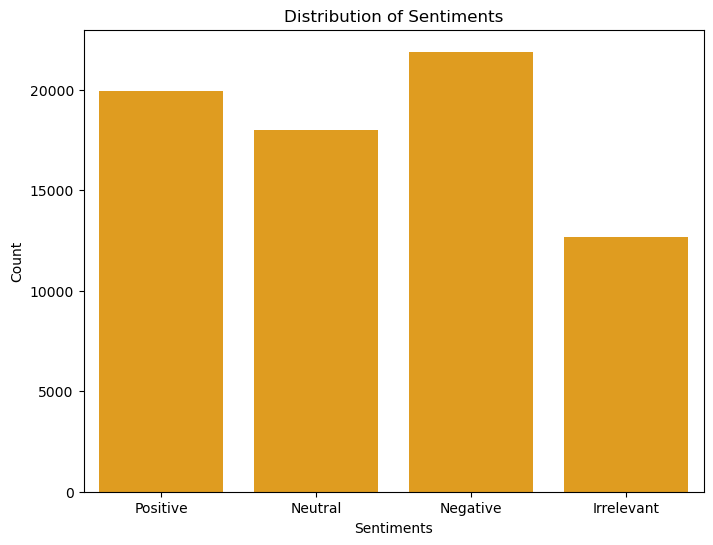

In [30]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=combined, color='orange')
plt.title('Distribution of Sentiments')
plt.xlabel("Sentiments")
plt.ylabel("Count")

# 2. Sentiment per Entity/Brand

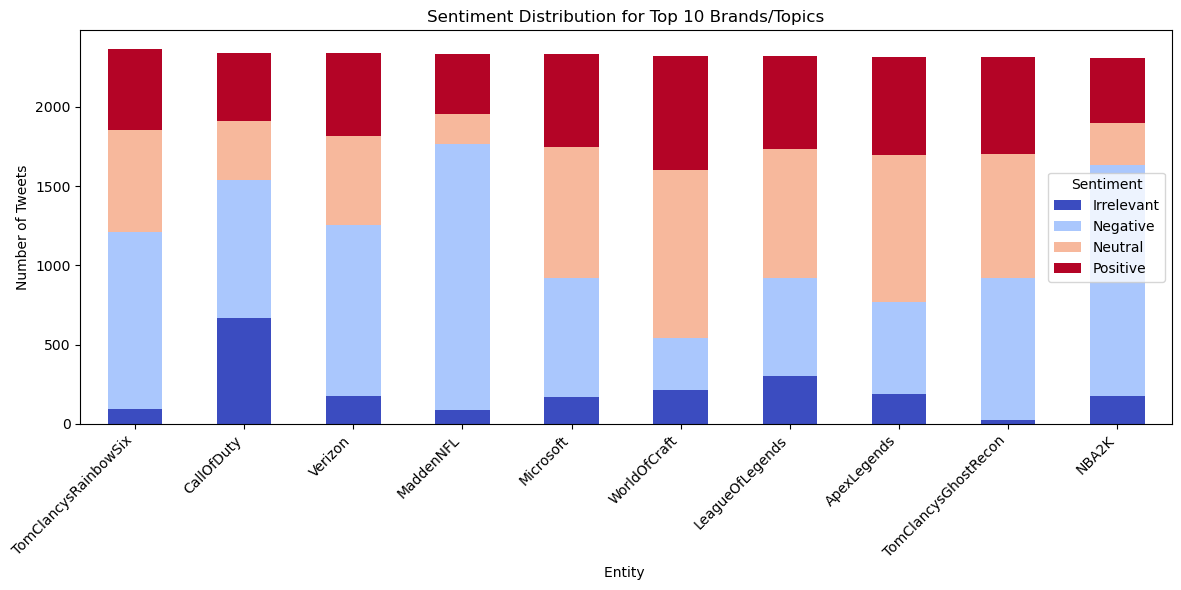

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by entity and sentiment
entity_sentiment = combined.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)

# Add total tweet count per entity
entity_sentiment['Total'] = entity_sentiment.sum(axis=1)

# Get top 10 entities by total tweets
top_entities = entity_sentiment.sort_values(by='Total', ascending=False).head(10)

# Drop total column for visualization
top_entities_vis = top_entities.drop(columns='Total')


top_entities_vis.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Sentiment Distribution for Top 10 Brands/Topics")
plt.xlabel("Entity ")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Top Positive/Negative Tweets per Brand

In [49]:
# Filter only positive and negative tweets
filtered = combined[combined['sentiment'].isin(['Positive', 'Negative'])]

# Sort (optional) if you want to sort alphabetically by entity
filtered = filtered.sort_values(by=['entity', 'sentiment'])

# Group by entity and sentiment, take the first tweet in each group
top_sentiment_tweets = filtered.groupby(['entity', 'sentiment']).first().reset_index()

# Show top few examples
top_sentiment_tweets[['entity', 'sentiment', 'Tweet content']].head(10)

,entity,sentiment,Tweet content
0,Amazon,Negative,@amazon wtf .
1,Amazon,Positive,Amazon has the coolest shit I never thought I ...
2,ApexLegends,Negative,40 MINUTES TO DOWNLOAD APEX LEGENDS WTF
3,ApexLegends,Positive,nice. @PlayApex pic.twitter.com/8OU90ohpJU
4,AssassinsCreed,Negative,I miss stuff like this in Assassin's Creed . ...
5,AssassinsCreed,Positive,No skull and bones no beyond good & evil 2... ...
6,Battlefield,Negative,"In multiplayer mode, I can't see any player be..."
7,Battlefield,Positive,waht a kill!! . . . store.playstation.com/
8,Borderlands,Negative,the biggest dissappoinment in my life came out...
9,Borderlands,Positive,im getting on borderlands and i will murder yo...


# 4. See which brands get the most attention

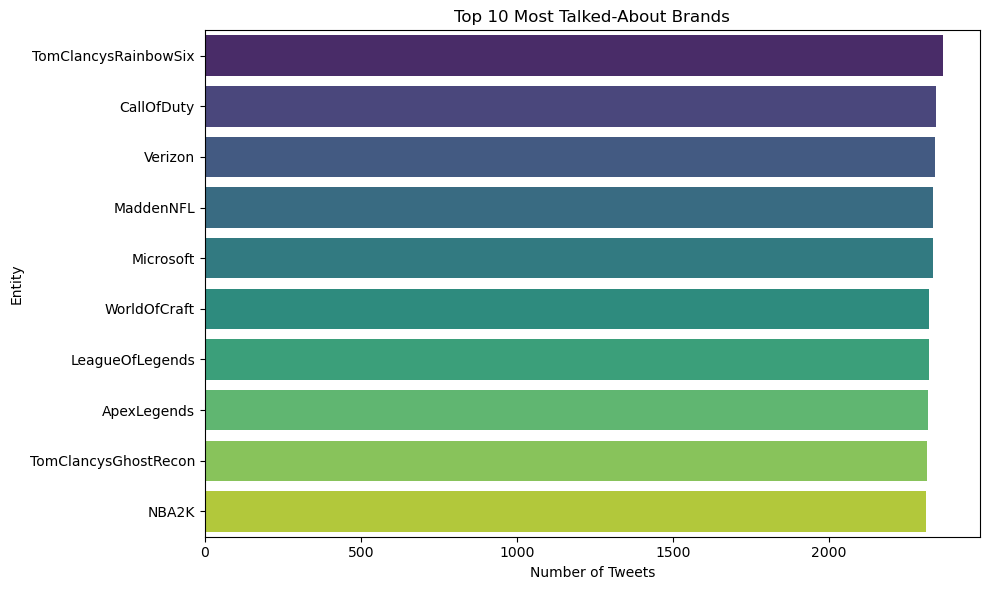

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count tweets per brand
brand_counts = combined['entity'].value_counts().head(10)  # Top 10 most talked-about brands

# Prepare the data
brand_counts = combined['entity'].value_counts().head(10)
brand_df = brand_counts.reset_index()
brand_df.columns = ['Brand', 'Tweet_Count']

# Plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_df, 
            x='Tweet_Count', y='Brand', hue='Brand', 
            palette='viridis', dodge=False, legend=False)

plt.title("Top 10 Most Talked-About Brands")
plt.xlabel("Number of Tweets")
plt.ylabel("Entity")
plt.tight_layout()
plt.show()

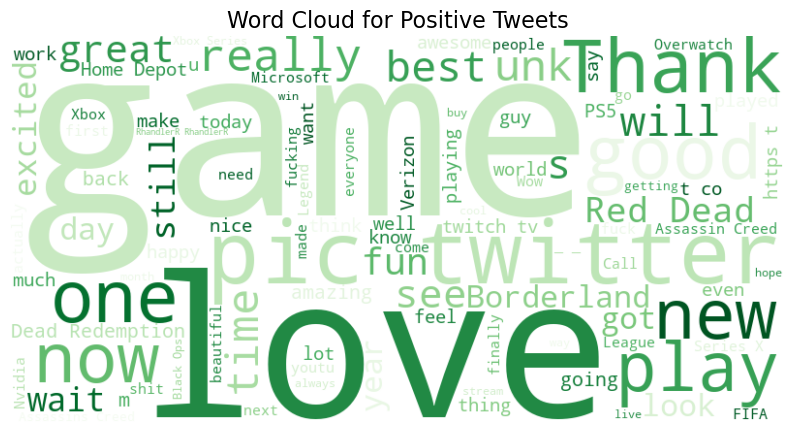

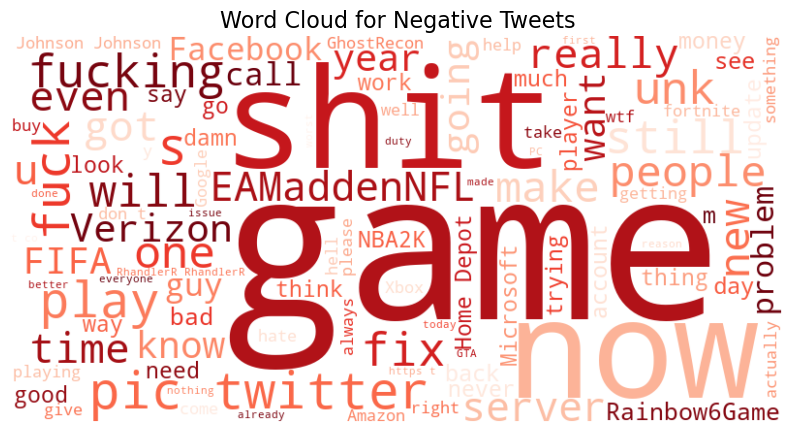

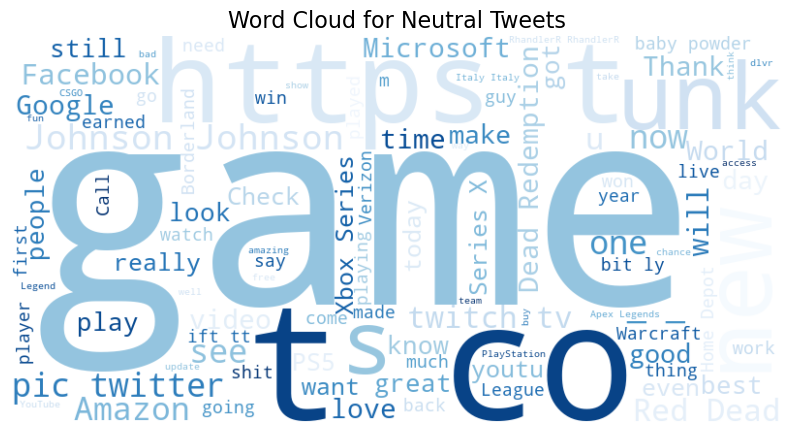

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud by sentiment
def plot_wordcloud(sentiment, color):
    text = ' '.join(combined[combined['sentiment'] == sentiment]['Tweet content'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color, max_words=100).generate(text)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets', fontsize=16)
    plt.show()


# Word Clouds for three sentiments
plot_wordcloud('Positive', 'Greens')
plot_wordcloud('Negative', 'Reds')
plot_wordcloud('Neutral', 'Blues')

In [ ]:
All Task Complete